In [1]:
# (1) 필요한 모듈 import하기
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
import pandas as pd

# (2) 데이터 준비
cancer = load_breast_cancer()

# (3) 데이터 이해하기
X = cancer.data # Feature Data 지정하기
print("Data, Feature :", X.shape)
y = cancer.target # Label Data 지정하기
print(f"Target Names : {cancer.target_names}")  # Target Names 출력

cancer_df = pd.DataFrame(X)
cancer_df.describe() # 데이타 Describe 

# (4) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Data, Feature : (569, 30)
Target Names : ['malignant' 'benign']


데이터셋 특징 :
1. 569개의 샘플, 30개의 특성을 가지고 악성(malignant)과 양성(benign) 이진 분류
2. 모든 특성이 연속형 변수. 각 특성은 유방 종양의 다양한 측정값을 나타냄


# (5)(6) 개별 모델 학습 및 평가

In [2]:
# 1. Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("\nDecision Tree 모델 평가 결과:")
print(classification_report(y_test, dt_pred, digits=3))


Decision Tree 모델 평가 결과:
              precision    recall  f1-score   support

           0      0.930     0.930     0.930        43
           1      0.958     0.958     0.958        71

    accuracy                          0.947       114
   macro avg      0.944     0.944     0.944       114
weighted avg      0.947     0.947     0.947       114



In [3]:
# 2.Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("\nRandom Forest 모델 평가 결과:")
print(classification_report(y_test, rf_pred, digits=3))


Random Forest 모델 평가 결과:
              precision    recall  f1-score   support

           0      0.976     0.930     0.952        43
           1      0.959     0.986     0.972        71

    accuracy                          0.965       114
   macro avg      0.967     0.958     0.962       114
weighted avg      0.965     0.965     0.965       114



In [4]:
# 3. SVM
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("\nSVM 모델 평가 결과:")
print(classification_report(y_test, svm_pred, digits=3))


SVM 모델 평가 결과:
              precision    recall  f1-score   support

           0      1.000     0.860     0.925        43
           1      0.922     1.000     0.959        71

    accuracy                          0.947       114
   macro avg      0.961     0.930     0.942       114
weighted avg      0.951     0.947     0.946       114



In [5]:
# 4. SGD Classifier
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)
print("\nSGD 모델 평가 결과:")
print(classification_report(y_test, sgd_pred, digits=3))


SGD 모델 평가 결과:
              precision    recall  f1-score   support

           0      1.000     0.744     0.853        43
           1      0.866     1.000     0.928        71

    accuracy                          0.904       114
   macro avg      0.933     0.872     0.891       114
weighted avg      0.916     0.904     0.900       114



In [6]:
# 5. Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("\nLogistic Regression 모델 평가 결과:")
print(classification_report(y_test, lr_pred, digits=3))


Logistic Regression 모델 평가 결과:
              precision    recall  f1-score   support

           0      0.975     0.907     0.940        43
           1      0.946     0.986     0.966        71

    accuracy                          0.956       114
   macro avg      0.960     0.946     0.953       114
weighted avg      0.957     0.956     0.956       114



c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
# 모델 성능 비교 프로세스
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
models = {'Decision Tree': dt, 'Random Forest': rf, 'SVM': svm, 'SGD': sgd, 'Logistic Regression': lr}
results = []
for name, model in models.items():
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    results.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}) 
results_df = pd.DataFrame(results, index=range(1, 6))
print("유방암 데이터 모델별 성능 비교:")
print(results_df.round(3))


유방암 데이터 모델별 성능 비교:
                 Model  Accuracy  Precision  Recall  F1-score
1        Decision Tree     0.947      0.947   0.947     0.947
2        Random Forest     0.965      0.965   0.965     0.965
3                  SVM     0.947      0.951   0.947     0.946
4                  SGD     0.904      0.916   0.904     0.900
5  Logistic Regression     0.956      0.957   0.956     0.956


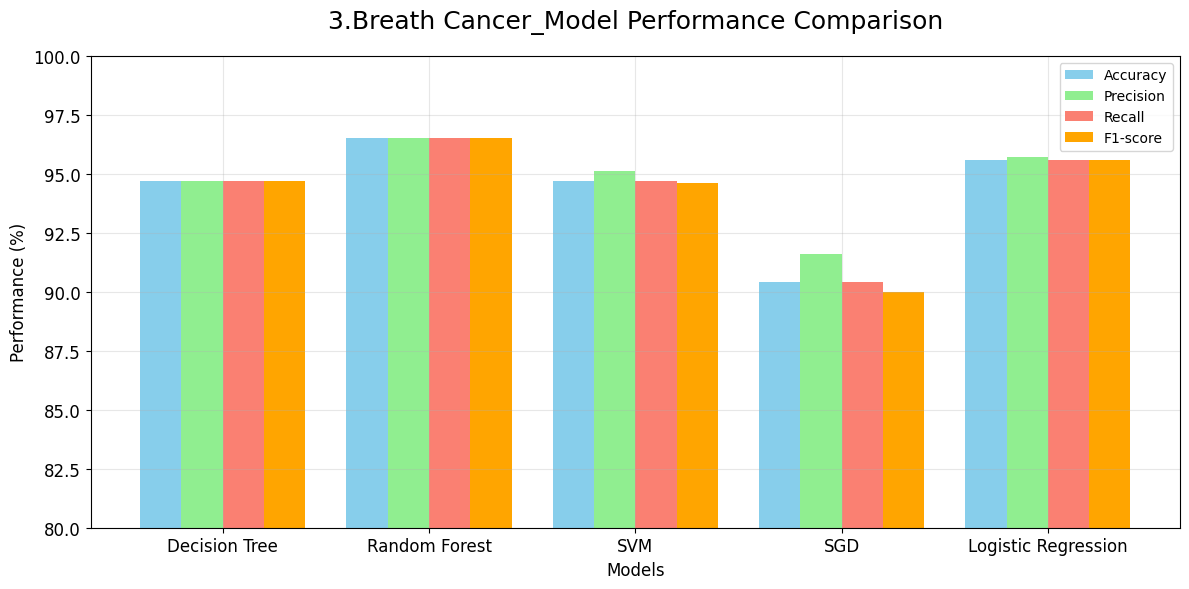

# 평가 비교

### 평가지표 선택 = Recall 이 중요
- Recall = TP / (TP + FN)에서 FP(악성을 양성으로 잘못 판단)를 최소화하는 것이 매우 중요
- 미발견 악성 종양(False Negative)의 위험성이 오진(False Positive)보다 훨씬 심각하고
- 조기 발견이 환자의 생존률과 직결되기 떄문에 추가 검사 비용보다 미발견으로 인한 위험이 더 크다_가족사 유경험

### 평가모델 선택 = Random Forest (+ Logistic Regression)
- 두 모델 모두 높은 재현율로 악성 종양 검출에 신뢰성 있음
- Random Forest는 모든 평가지표에서 최고 성능을 보이고 있고
- 결과 검증과 해석을 위해 Logistic Regression 을 보조 모델로 활용해도 좋을 듯하다.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {'Decision Tree': dt,'Random Forest': rf,'SVM': svm,'SGD': sgd,'Logistic Regression': lr}
results = []
for name, model in models.items():
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    
    results.append({'Model': name,'Accuracy': f'{accuracy*100:.1f}%','Precision': f'{precision*100:.1f}%',     'Recall': f'{recall*100:.1f}%','F1-score': f'{f1*100:.1f}%'})
results_df = pd.DataFrame(results, index=range(1, 6))

numeric_columns = ['Accuracy', 'Precision', 'Recall', 'F1-score']
for col in numeric_columns:
    results_df[col] = results_df[col].str.rstrip('%').astype(float)

plt.figure(figsize=(12, 6))
x = np.arange(len(results_df))
width = 0.2

plt.bar(x - width*1.5, results_df['Accuracy'], width, label='Accuracy', color='skyblue')
plt.bar(x - width/2, results_df['Precision'], width, label='Precision', color='lightgreen')
plt.bar(x + width/2, results_df['Recall'], width, label='Recall', color='salmon')
plt.bar(x + width*1.5, results_df['F1-score'], width, label='F1-score', color='orange')

plt.xlabel('Models', fontsize=12)
plt.ylabel('Performance (%)', fontsize=12)
plt.title('3.Breath Cancer_Model Performance Comparison', fontsize=18, pad=20)
plt.xticks(x, results_df['Model'], rotation=0)
plt.legend(fontsize=10)  # 범례 폰트 크기 조정
plt.tick_params(axis='both', labelsize=12)  # x, y축 눈금 라벨 크기 조정
plt.grid(True, alpha=0.3)
plt.ylim(80, 100)
plt.tight_layout()
plt.show()